In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# Charger le dataset
df = pd.read_csv('RT_IOT2022.csv')

# Supprimer la première colonne (identifiant)
df = df.drop(columns=df.columns[0])

# Séparer les caractéristiques (features) et la cible (target)
X = df.drop('Attack_type', axis=1)
y = df['Attack_type']

# Encodage des variables catégorielles
label_encoder = LabelEncoder()

# Encoder 'proto' et 'service'
X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])

# Encodage de la cible en valeurs numériques
y_encoded = label_encoder.fit_transform(y)

# Standardisation des caractéristiques numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Afficher les formes des ensembles de données pour vérification
print(f"Ensemble d'entraînement : X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Ensemble de test : X_test: {X_test.shape}, y_test: {y_test.shape}")


Ensemble d'entraînement : X_train: (98493, 83), y_train: (98493,)
Ensemble de test : X_test: (24624, 83), y_test: (24624,)


Number of components to explain 99% of the variance: 37
Number of components to explain 99% of the variance: 37
List of selected components (1-based index): [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
Loadings of the selected components:
                           PC1       PC2       PC3       PC4       PC5  \
id.orig_p             0.042570 -0.018092 -0.003620 -0.074233 -0.031133   
id.resp_p            -0.004992 -0.009812 -0.060840 -0.099678 -0.041582   
proto                -0.024491  0.021951 -0.074411 -0.263541 -0.054708   
service               0.192054 -0.061028  0.095843 -0.105842 -0.036918   
flow_duration         0.074497  0.021628 -0.158144 -0.032480  0.302729   
...                        ...       ...       ...       ...       ...   
idle.avg              0.173007 -0.157169 -0.124264  0.053706 -0.085094   
idle.std              0.080080 -0.022569 -0.041131  0.004016  0.013096   


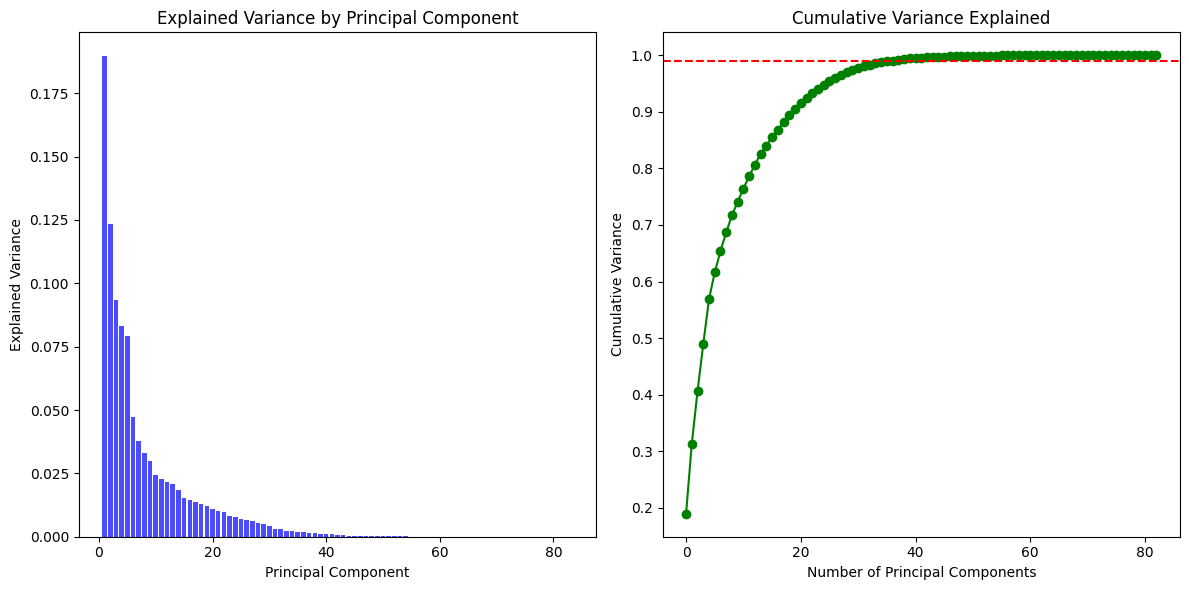

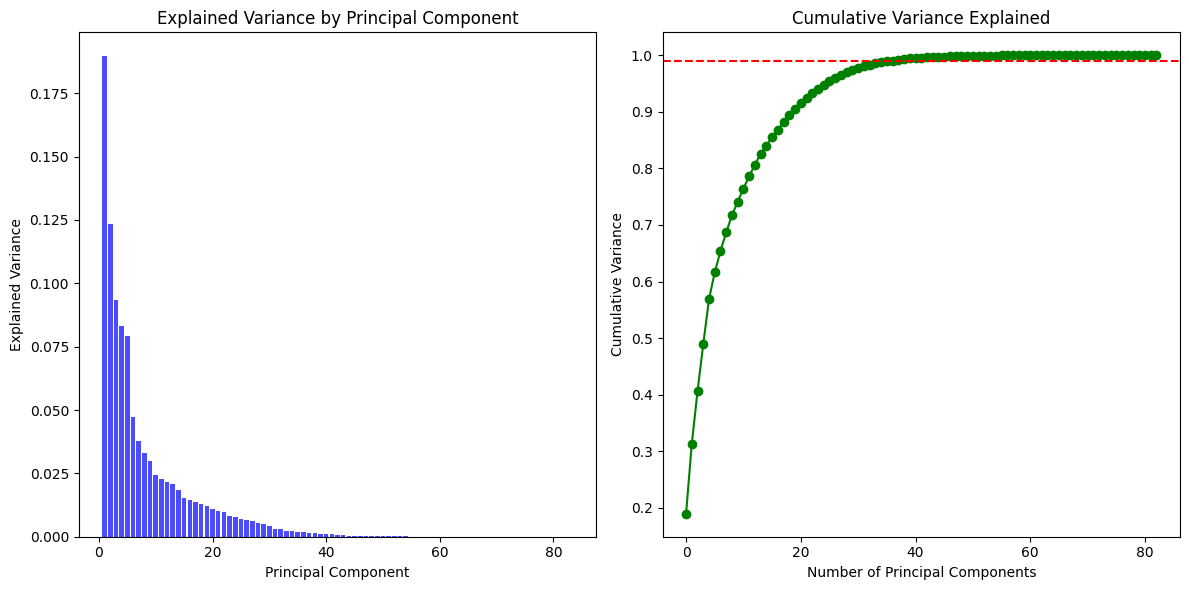

In [16]:
# Apply PCA with all components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Determine the number of components needed to explain 99% of the variance
n_components_99 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.99) + 1
print(f'Number of components to explain 99% of the variance: {n_components_99}')

# Determine the number of components needed to explain 99% of the variance
n_components_99 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.99) + 1
print(f'Number of components to explain 99% of the variance: {n_components_99}')

# Display the list of principal components selected
selected_components = list(range(1, n_components_99 + 1))
print(f'List of selected components (1-based index): {selected_components}')
# Get the loadings of the selected components
loadings = pca.components_[:n_components_99]

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(n_components_99)], index=X.columns)
print("Loadings of the selected components:")
print(loadings_df)

# Visualize the explained variance and cumulative variance
plt.figure(figsize=(12, 6))

# Histogram of explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')

# Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance, marker='o', color='green')
plt.axhline(y=0.99, color='red', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance Explained')

plt.tight_layout()
plt.show()
# Visualize the explained variance and cumulative variance
plt.figure(figsize=(12, 6))

# Histogram of explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')

# Cumulative variance
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance, marker='o', color='green')
plt.axhline(y=0.99, color='red', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.title('Cumulative Variance Explained')

plt.tight_layout()
plt.show()

In [18]:
# Définir le seuil de variance expliquée souhaité
threshold = 0.99
n_components = (cumulative_variance < threshold).sum() + 1

print(f"Nombre de composantes principales pour atteindre {threshold * 100}% de variance expliquée : {n_components}")

# Appliquer PCA avec le nombre de composantes sélectionnées
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)

print(f"Variance expliquée totale avec {n_components} composantes : {sum(pca.explained_variance_ratio_)}")


Nombre de composantes principales pour atteindre 99.0% de variance expliquée : 37
Variance expliquée totale avec 37 composantes : 0.9906847945284163


In [31]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X is your original DataFrame
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.99)  # Set to explain 99% of variance
X_pca = pca.fit_transform(X_scaled)

# Get the column names from X
feature_names = X.columns

# Create a DataFrame for loadings of the selected components
loadings = pd.DataFrame(pca.components_.T, index=feature_names, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Selected features are:\n", loadings)

# Number of components explaining 99% of variance
n_components_99 = pca.n_components_

# Select only the components needed
selected_loadings = loadings.iloc[:, :n_components_99]

# Display selected loadings as a table
print("Selected Features for Principal Components:\n")
print(selected_loadings)

# Construct sentences for each principal component
for i in range(n_components_99):
    pc = f'PC{i+1}'
    sorted_loadings = selected_loadings[pc].abs().sort_values(ascending=False)
    top_features = sorted_loadings.head(37).index.tolist()  # Get top 10 features for each principal component
    
    # Create a sentence describing the top features
    features_sentence = f'Top contributing features to {pc} are: {", ".join(top_features)}'
    print(features_sentence)


Selected features are:
                            PC1       PC2       PC3       PC4       PC5  \
id.orig_p             0.042570 -0.018092 -0.003620 -0.074233 -0.031133   
id.resp_p            -0.004992 -0.009812 -0.060840 -0.099678 -0.041582   
proto                -0.024491  0.021951 -0.074411 -0.263541 -0.054708   
service               0.192054 -0.061028  0.095843 -0.105842 -0.036918   
flow_duration         0.074497  0.021628 -0.158144 -0.032480  0.302729   
...                        ...       ...       ...       ...       ...   
idle.avg              0.173007 -0.157169 -0.124264  0.053706 -0.085094   
idle.std              0.080080 -0.022569 -0.041131  0.004016  0.013096   
fwd_init_window_size  0.192095 -0.090775  0.075574 -0.013289 -0.053839   
bwd_init_window_size  0.191774 -0.070375  0.093681 -0.022740 -0.033423   
fwd_last_window_size  0.014975 -0.013591 -0.005444  0.008848 -0.020468   

                           PC6       PC7       PC8       PC9      PC10  ...  \
id.orig_

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components_99)
X_pca_selected = pca.fit_transform(X_scaled)

# Perform K-Means clustering on the principal components
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_selected)

# Visualize the clustering result in the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_selected[:, 0], X_pca_selected[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title('Clustering of Data in Principal Component Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.83864346606424, tolerance: 47.931915465644884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359.5290404726984, tolerance: 47.931915465644884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 248.132782693021, tolerance: 47.931915465644884
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\line

Number of selected features: 38
Selected features: [ 1  3  4  9 12 13 14 17 19 20 21 23 25 27 29 30 31 34 38 39 42 44 50 52
 54 56 60 62 63 69 70 72 74 75 79 80 81 82]
Accuracy with selected features: 0.9961


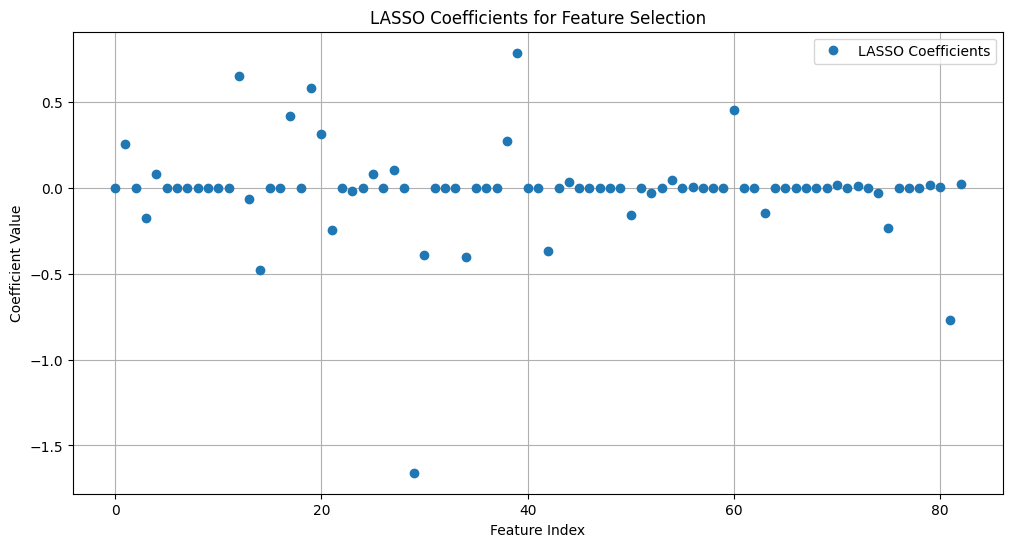

Execution time: 8.51 seconds


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time

# Measure the start time
start_time = time.time()

# Load dataset
df = pd.read_csv('RT_IOT2022.csv')
df = df.drop(columns=df.columns[0])  # Drop the first column (identifier)

# Separate features and target
X = df.drop('Attack_type', axis=1)
y = df['Attack_type']

# Encode categorical variables
label_encoder = LabelEncoder()
X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Apply LASSO for feature selection
lasso = LassoCV(alphas=np.logspace(-4, 4, 100), cv=5, max_iter=10000, random_state=42)
lasso.fit(X_train, y_train)

# Get the selected features
selected_features = np.where(lasso.coef_ != 0)[0]

# Print the number of selected features
print(f"Number of selected features: {len(selected_features)}")
print(f"Selected features: {selected_features}")

# Train and evaluate a model using the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_selected, y_train)
predictions = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy with selected features: {accuracy:.4f}")

# Plot the coefficients
plt.figure(figsize=(12, 6))
plt.plot(lasso.coef_, 'o', label='LASSO Coefficients')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('LASSO Coefficients for Feature Selection')
plt.grid()
plt.legend()
plt.show()

# Measure the end time and print the execution time
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")


Execution time: 38.97 seconds
Selected features (RFE): [0, 1, 2, 3, 6, 7, 9, 10, 11, 12, 13, 15, 19, 25, 30, 31, 32, 35, 37, 38, 39, 40, 41, 42, 43, 44, 46, 49, 54, 55, 57, 59, 60, 62, 63, 70, 71, 73, 80, 82]


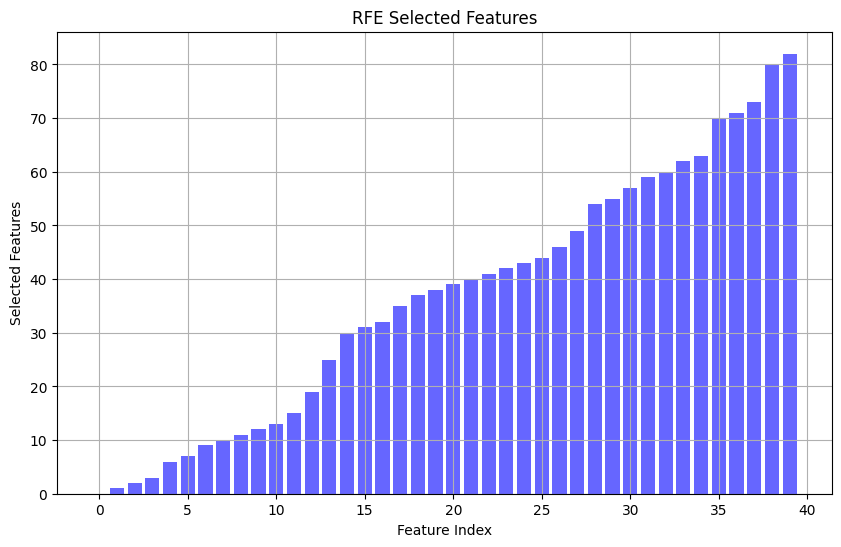

Selected feature names (RFE): ['id.orig_p', 'id.resp_p', 'proto', 'service', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_max', 'flow_FIN_flag_count', 'fwd_URG_flag_count', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'bwd_pkts_payload.max', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.min', 'fwd_iat.tot', 'bwd_iat.min', 'flow_iat.min', 'flow_iat.max', 'flow_iat.avg', 'payload_bytes_per_second', 'fwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_bytes', 'active.min', 'active.max', 'active.avg', 'fwd_init_window_size', 'fwd_last_window_size']


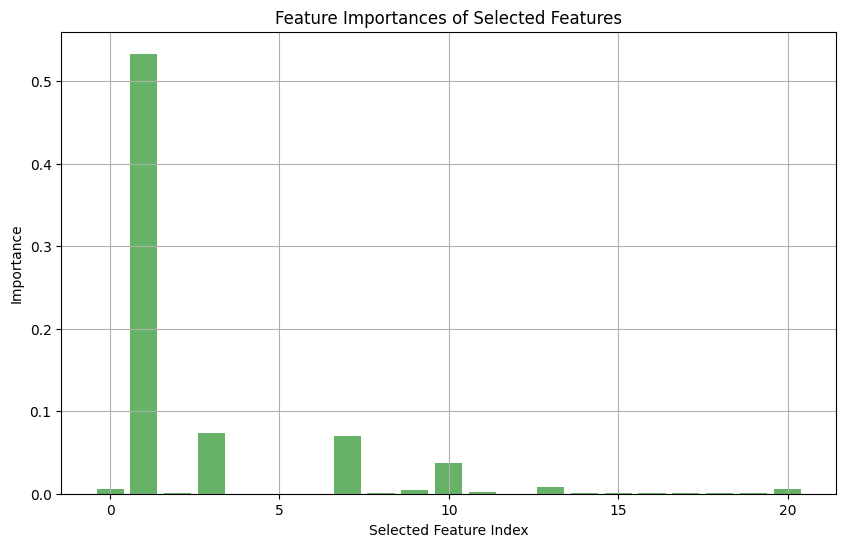

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import time

# Measure the start time
start_time = time.time()

# Load dataset
df = pd.read_csv('RT_IOT2022.csv')
df = df.drop(columns=df.columns[0])  # Drop the first column (identifier)

# Separate features and target
X = df.drop('Attack_type', axis=1)
y = df['Attack_type']

# Encode categorical variables
label_encoder = LabelEncoder()
X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])
y_encoded = label_encoder.fit_transform(y)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Apply RFE
model = DecisionTreeClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=40)  # Change the number of features as needed
rfe.fit(X_train, y_train)
selected_features_rfe = [i for i, support in enumerate(rfe.support_) if support]

# Measure the end time and calculate the execution time
end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time:.2f} seconds")
print(f"Selected features (RFE): {selected_features_rfe}")

# Visualization of RFE selected features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features_rfe)), selected_features_rfe, color='blue', alpha=0.6)
plt.xlabel('Feature Index')
plt.ylabel('Selected Features')
plt.title('RFE Selected Features')
plt.grid(True)
plt.show()

# Get feature names
feature_names = X.columns

# Map indices to feature names
selected_feature_names = [feature_names[i] for i in selected_features_rfe]

print(f"Selected feature names (RFE): {selected_feature_names}")

# Visualization of feature importance
feature_importances = rfe.estimator_.feature_importances_

# Ensure selected_features_rfe are within bounds
selected_features_rfe = [i for i in selected_features_rfe if i < len(feature_importances)]
selected_feature_importances = feature_importances[selected_features_rfe]

plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features_rfe)), selected_feature_importances, color='green', alpha=0.6)
plt.xlabel('Selected Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances of Selected Features')
plt.grid(True)
plt.show()


hi there
   Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0           0      38667       1883   tcp    mqtt      32.011598   
1           1      51143       1883   tcp    mqtt      31.883584   
2           2      44761       1883   tcp    mqtt      32.124053   
3           3      60893       1883   tcp    mqtt      31.961063   
4           4      51087       1883   tcp    mqtt      31.902362   

   fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0             9             5                  3                  3  ...   
1             9             5                  3                  3  ...   
2             9             5                  3                  3  ...   
3             9             5                  3                  3  ...   
4             9             5                  3                  3  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e

C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Begin iteration num 2/40
Begin iteration num 3/40
Begin iteration num 4/40
Begin iteration num 5/40
Begin iteration num 6/40
Begin iteration num 7/40
Begin iteration num 8/40
Begin iteration num 9/40
Begin iteration num 10/40
Begin iteration num 11/40
Begin iteration num 12/40


C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Begin iteration num 13/40
Begin iteration num 14/40
Begin iteration num 15/40


C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Begin iteration num 16/40
Begin iteration num 17/40
Begin iteration num 18/40
Begin iteration num 19/40
Begin iteration num 20/40


C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Begin iteration num 21/40


C:\Users\DELL\Documents\IEEE\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Begin iteration num 22/40
Begin iteration num 23/40
Begin iteration num 24/40
Begin iteration num 25/40
Begin iteration num 26/40
Begin iteration num 27/40
Begin iteration num 28/40
Begin iteration num 29/40
Begin iteration num 30/40
Begin iteration num 31/40
Begin iteration num 32/40
Begin iteration num 33/40
Begin iteration num 34/40
Begin iteration num 35/40
Begin iteration num 36/40
Begin iteration num 37/40
Begin iteration num 38/40
Begin iteration num 39/40
Begin iteration num 40/40


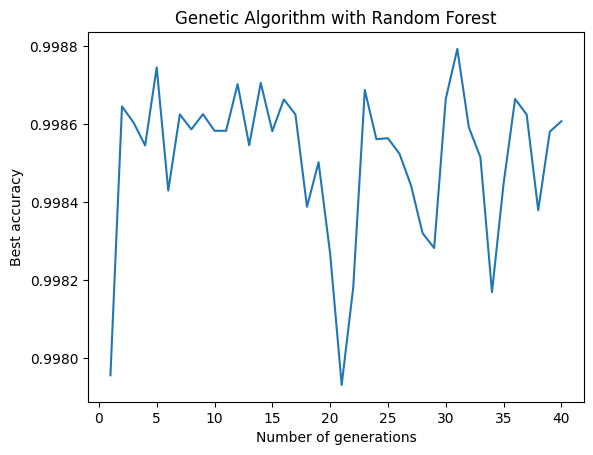

Best features selected: Index(['Unnamed: 0', 'id.orig_p', 'flow_duration', 'fwd_pkts_tot',
       'flow_pkts_per_sec', 'down_up_ratio', 'bwd_header_size_min',
       'bwd_header_size_max', 'flow_FIN_flag_count', 'flow_SYN_flag_count',
       'flow_ACK_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max',
       'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min',
       'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg',
       'bwd_pkts_payload.std', 'flow_pkts_payload.avg', 'fwd_iat.min',
       'fwd_iat.tot', 'fwd_iat.std', 'bwd_iat.min', 'bwd_iat.tot',
       'flow_iat.min', 'flow_iat.max', 'flow_iat.std',
       'payload_bytes_per_second', 'fwd_subflow_pkts', 'bwd_subflow_pkts',
       'bwd_subflow_bytes', 'bwd_bulk_packets', 'active.max', 'active.tot',
       'active.avg', 'active.std', 'idle.avg', 'fwd_last_window_size'],
      dtype='object')

temps exex :  2723.736466884613


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

# Load your dataset
print('hi there')
data = pd.read_csv("RT_IOT2022.csv")
print(data.head())
print(data.info())

# Separate target and features
target = data['Attack_type']
features = data.drop('Attack_type', axis=1)

start_time = time.time()

# Encode categorical variables
label_encoder = LabelEncoder()
for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])
target_encoded = label_encoder.fit_transform(target)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

def generate_random_individuals(population_size, num_features, min_features, max_features):
    individuals = np.zeros((population_size, num_features))
    for i in range(population_size):
        num_ones = np.random.randint(min_features, max_features + 1)
        ones_indices = np.random.choice(num_features, num_ones, replace=False)
        individuals[i, ones_indices] = 1
    return individuals

def train_model(x_train, x_test, y_train, y_test, predictor_names):
    x_train = x_train.loc[:, predictor_names]
    x_test = x_test.loc[:, predictor_names]
    
    # Building the Random Forest model
    mdl = RandomForestClassifier(random_state=1)
    mdl.fit(x_train, y_train)
    y_hat = mdl.predict(x_test)
    prec = precision_score(y_test, y_hat, average='weighted')  # Adjusted to 'weighted' for multi-class classification
    return prec

def choose_parents(population, accuracy, elite_percent):
    elite_num = int(round(((elite_percent * population.shape[0]) // 2) * 2))
    ind_ac = np.argsort(-accuracy)
    top_perc = ind_ac[:elite_num]
    elite_population = population[top_perc, :]
    
    weight_norm = accuracy / accuracy.sum()
    weight_comu = weight_norm.cumsum()
    
    num_parents_wo_elite = population.shape[0] - elite_num
    parents_wo_elite = np.empty([num_parents_wo_elite, population.shape[1]])
    for count in range(num_parents_wo_elite):
        b = weight_comu[-1]
        rand_num = np.random.uniform(0, b)
        indices = np.searchsorted(weight_comu, rand_num)
        parents_wo_elite[count, :] = population[indices, :]
    
    parents = np.concatenate((elite_population, parents_wo_elite), axis=0)
    return parents

def one_point_crossover(parents, elite_percent, mutation_probability, min_features, max_features):
    elite_num = int(round(((elite_percent * population.shape[0]) // 2) * 2))
    crossover_population = np.zeros((parents.shape[0], parents.shape[1]))
    crossover_population[0:elite_num, :] = parents[0:elite_num, :]
    
    for ii in range(int((parents.shape[0] - elite_num) / 2)):
        n = 2 * ii + elite_num
        parents_couple = parents[n:n + 2, :]
        b2 = parents.shape[1]
        rand_n = np.random.randint(1, b2 - 1)
        crossover_population[n, :] = np.concatenate([parents_couple[0, :rand_n], parents_couple[1, rand_n:]])
        crossover_population[n + 1, :] = np.concatenate([parents_couple[1, :rand_n], parents_couple[0, rand_n:]])
    
    for kk in range(crossover_population.shape[0]):
        Sum = np.sum(crossover_population[kk, :])
        if Sum > max_features:
            excess = int(Sum - max_features)
            indices = np.where(crossover_population[kk, :] == 1)[0]
            position1 = np.random.choice(indices, size=excess, replace=False)
            crossover_population[kk, position1] = 0
        elif Sum < min_features:
            missing = int(min_features - Sum)
            indices = np.where(crossover_population[kk, :] == 0)[0]
            position2 = np.random.choice(indices, size=missing, replace=False)
            crossover_population[kk, position2] = 1
    
    child_row = crossover_population.shape[0]
    child_col = crossover_population.shape[1]
    num_mutations = round(child_row * child_col * mutation_probability)
    for jj in range(num_mutations):
        ind_row = np.random.randint(0, child_row)
        ind_col = np.random.randint(0, child_col)
        if (crossover_population[ind_row, ind_col] == 0 and
            np.sum(crossover_population[ind_row, :]) < max_features):
            crossover_population[ind_row, ind_col] = 1
        elif (crossover_population[ind_row, ind_col] == 1 and
              np.sum(crossover_population[ind_row, :]) >= min_features + 1):
            crossover_population[ind_row, ind_col] = 0
    
    return crossover_population

# Hyperparameters
num_features = features.shape[1]
min_features = 2
population_size = 8
max_iterations = 40
elite_percent = 0.4
mutation_probability = 0.2
max_features = 40

# Main loop - gen 0
population = generate_random_individuals(population_size, num_features, min_features, max_features)

accuracy = np.zeros(population_size)
predictor_names = features.columns
for i in range(population_size):
    predictor_names_i = predictor_names[population[i, :] == 1]
    accuracy_i = train_model(x_train, x_test, y_train, y_test, predictor_names_i)
    accuracy[i] = accuracy_i

gen = 0
best_acc_i = np.zeros(max_iterations)
best_acc_i[gen] = max(accuracy)

while gen < max_iterations - 1:
    print(f'Begin iteration num {gen + 2}/{max_iterations}')
    gen += 1
    parents = choose_parents(population, accuracy, elite_percent)
    children = one_point_crossover(parents, elite_percent, mutation_probability, min_features, max_features)
    population = children
    for ind in range(population_size):
        predictor_names_ind = predictor_names[population[ind, :] == 1]
        accuracy_ind = train_model(x_train, x_test, y_train, y_test, predictor_names_ind)
        accuracy[ind] = accuracy_ind
    best_acc_i[gen] = max(accuracy)

ind_max_acc = np.argmax(accuracy)
best_features = population[ind_max_acc, :]

# Plot results
best_features_names = predictor_names[best_features == 1]
plt.plot(range(1, max_iterations + 1), best_acc_i)
plt.xlabel('Number of generations')
plt.ylabel('Best accuracy')
plt.title('Genetic Algorithm with Random Forest')
plt.show()

print(f"Best features selected: {best_features_names}")
end_time = time.time()
exec_time = end_time - start_time
print("\ntemps exex : " , exec_time)

hi there
   Unnamed: 0  id.orig_p  id.resp_p proto service  flow_duration  \
0           0      38667       1883   tcp    mqtt      32.011598   
1           1      51143       1883   tcp    mqtt      31.883584   
2           2      44761       1883   tcp    mqtt      32.124053   
3           3      60893       1883   tcp    mqtt      31.961063   
4           4      51087       1883   tcp    mqtt      31.902362   

   fwd_pkts_tot  bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  ...  \
0             9             5                  3                  3  ...   
1             9             5                  3                  3  ...   
2             9             5                  3                  3  ...   
3             9             5                  3                  3  ...   
4             9             5                  3                  3  ...   

   active.std      idle.min      idle.max      idle.tot      idle.avg  \
0         0.0  2.972918e+07  2.972918e+07  2.972918e

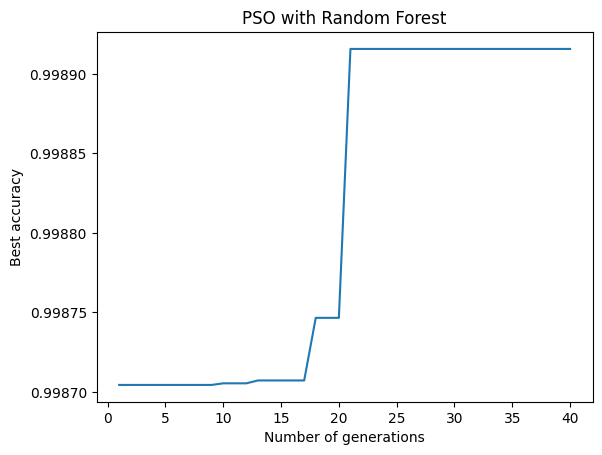

Best features selected: Index(['Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service',
       'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot',
       'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min',
       'fwd_header_size_max', 'bwd_header_size_min', 'bwd_header_size_max',
       'bwd_URG_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.tot',
       'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot',
       'bwd_pkts_payload.std', 'flow_pkts_payload.min',
       'flow_pkts_payload.max', 'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.avg',
       'fwd_iat.std', 'bwd_iat.min', 'bwd_iat.avg', 'bwd_iat.std',
       'flow_iat.avg', 'bwd_subflow_pkts', 'fwd_subflow_bytes',
       'fwd_bulk_bytes', 'bwd_bulk_bytes', 'fwd_bulk_rate', 'bwd_bulk_rate',
       'active.min', 'idle.max', 'fwd_init_window_size',
       'fwd_last_window_size'],
      dtype='object')

Execution time:  3671.1634907722473


In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import time

# Load your dataset
print('hi there')
data = pd.read_csv("RT_IOT2022.csv")
print(data.head())
print(data.info())

# Separate target and features
target = data['Attack_type']
features = data.drop('Attack_type', axis=1)

start_time = time.time()

# Encode categorical variables
label_encoder = LabelEncoder()
for col in features.select_dtypes(include=['object']).columns:
    features[col] = label_encoder.fit_transform(features[col])
target_encoded = label_encoder.fit_transform(target)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

def train_model(x_train, x_test, y_train, y_test, predictor_names):
    x_train = x_train.loc[:, predictor_names]
    x_test = x_test.loc[:, predictor_names]
    
    # Building the Random Forest model
    mdl = RandomForestClassifier(random_state=1)
    mdl.fit(x_train, y_train)
    y_hat = mdl.predict(x_test)
    prec = precision_score(y_test, y_hat, average='weighted')  # Adjusted to 'weighted' for multi-class classification
    return prec

def initialize_particles(population_size, num_features, min_features, max_features):
    particles = np.random.randint(2, size=(population_size, num_features))
    
    for i in range(population_size):
        num_features_selected = np.sum(particles[i, :])
        if num_features_selected < min_features:
            while num_features_selected < min_features:
                index = np.random.randint(0, num_features)
                particles[i, index] = 1
                num_features_selected += 1
        elif num_features_selected > max_features:
            while num_features_selected > max_features:
                index = np.random.randint(0, num_features)
                particles[i, index] = 0
                num_features_selected -= 1
    
    return particles

def update_particles(particles, velocities, p_best_positions, g_best_position, w, c1, c2):
    num_particles, num_features = particles.shape
    r1 = np.random.rand(num_particles, num_features)
    r2 = np.random.rand(num_particles, num_features)
    
    velocities = w * velocities + c1 * r1 * (p_best_positions - particles) + c2 * r2 * (g_best_position - particles)
    velocities = np.clip(velocities, -1, 1)
    
    particles = np.where(np.random.rand(num_particles, num_features) < 1 / (1 + np.exp(-velocities)), 1, 0)
    
    return particles, velocities

def evaluate_particles(particles, x_train, x_test, y_train, y_test, predictor_names):
    accuracies = np.zeros(particles.shape[0])
    for i in range(particles.shape[0]):
        predictor_names_i = predictor_names[particles[i, :] == 1]
        accuracies[i] = train_model(x_train, x_test, y_train, y_test, predictor_names_i)
    return accuracies

# Hyperparameters
num_features = features.shape[1]
min_features = 2
population_size = 8
max_iterations = 40
w = 0.5  # inertia weight
c1 = 1.5  # cognitive coefficient
c2 = 1.5  # social coefficient
max_features = 40

# Initialize particles
particles = initialize_particles(population_size, num_features, min_features, max_features)
velocities = np.zeros_like(particles)

p_best_positions = np.copy(particles)
p_best_scores = np.zeros(population_size)

g_best_position = None
g_best_score = -np.inf

# Main loop
gen = 0
best_acc_i = np.zeros(max_iterations)

while gen < max_iterations:
    print(f'Begin iteration num {gen + 1}/{max_iterations}')
    accuracies = evaluate_particles(particles, x_train, x_test, y_train, y_test, features.columns)
    
    for i in range(population_size):
        if accuracies[i] > p_best_scores[i]:
            p_best_scores[i] = accuracies[i]
            p_best_positions[i] = particles[i]
    
    best_idx = np.argmax(accuracies)
    if accuracies[best_idx] > g_best_score:
        g_best_score = accuracies[best_idx]
        g_best_position = particles[best_idx]
    
    particles, velocities = update_particles(particles, velocities, p_best_positions, g_best_position, w, c1, c2)
    
    best_acc_i[gen] = g_best_score
    gen += 1

# Plot results
best_features_names = features.columns[g_best_position == 1]
plt.plot(range(1, max_iterations + 1), best_acc_i)
plt.xlabel('Number of generations')
plt.ylabel('Best accuracy')
plt.title('PSO with Random Forest')
plt.show()

print(f"Best features selected: {best_features_names}")
end_time = time.time()
exec_time = end_time - start_time
print("\nExecution time: ", exec_time)


In [32]:
import pandas as pd

# Original features
original_features = [
    'Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'flow_duration', 'fwd_pkts_tot', 
    'bwd_pkts_tot', 'fwd_data_pkts_tot', 'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 
    'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 
    'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 
    'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'fwd_PSH_flag_count', 
    'bwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_URG_flag_count', 'bwd_URG_flag_count', 
    'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 
    'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std', 'bwd_pkts_payload.min', 
    'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std', 
    'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 
    'flow_pkts_payload.std', 'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std', 
    'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot', 'bwd_iat.avg', 'bwd_iat.std', 'flow_iat.min', 
    'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std', 'payload_bytes_per_second', 
    'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_bytes', 'fwd_bulk_bytes', 
    'bwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_bulk_packets', 'fwd_bulk_rate', 'bwd_bulk_rate', 
    'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std', 'idle.min', 'idle.max', 
    'idle.tot', 'idle.avg', 'idle.std', 'fwd_init_window_size', 'bwd_init_window_size', 
    'fwd_last_window_size', 'Attack_type'
]

# Features selected by PCA
pca_features = [
    'fwd_init_window_size', 'service', 'bwd_init_window_size', 'flow_iat.max', 'fwd_iat.max', 
    'idle.max', 'idle.avg', 'flow_iat.std', 'fwd_subflow_pkts', 'fwd_iat.std', 'fwd_header_size_max', 
    'idle.min', 'bwd_pkts_payload.max', 'flow_iat.avg', 'bwd_pkts_payload.std', 'fwd_header_size_tot', 
    'flow_pkts_payload.max', 'bwd_iat.max', 'bwd_pkts_payload.avg', 'bwd_header_size_max', 
    'fwd_iat.avg', 'fwd_pkts_payload.std', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 
    'fwd_pkts_payload.min', 'bwd_iat.std', 'flow_ACK_flag_count', 'bwd_subflow_pkts', 
    'flow_pkts_payload.std', 'bwd_iat.avg', 'fwd_header_size_min', 'bwd_PSH_flag_count', 
    'fwd_pkts_payload.max', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_PSH_flag_count', 'bwd_header_size_tot'
]

# Features selected by PSO with RF
pso_features = [
    'Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 
    'bwd_data_pkts_tot', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 
    'fwd_header_size_max', 'bwd_header_size_min', 'bwd_header_size_max', 'bwd_URG_flag_count', 
    'fwd_pkts_payload.min', 'fwd_pkts_payload.tot', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 
    'bwd_pkts_payload.tot', 'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 
    'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.avg', 'fwd_iat.std', 'bwd_iat.min', 'bwd_iat.avg', 
    'bwd_iat.std', 'flow_iat.avg', 'bwd_subflow_pkts', 'fwd_subflow_bytes', 'fwd_bulk_bytes', 
    'bwd_bulk_bytes', 'fwd_bulk_rate', 'bwd_bulk_rate', 'active.min', 'idle.max', 
    'fwd_init_window_size', 'fwd_last_window_size'
]

# Create a DataFrame to store the features and their selection status
features_df = pd.DataFrame({
    'Feature': original_features,
    'Selected by PCA': ['Yes' if feature in pca_features else 'No' for feature in original_features],
    'Selected by PSO': ['Yes' if feature in pso_features else 'No' for feature in original_features]
})

# Display the DataFrame
print(features_df)


                 Feature Selected by PCA Selected by PSO
0             Unnamed: 0              No             Yes
1              id.orig_p              No             Yes
2              id.resp_p              No             Yes
3                  proto              No             Yes
4                service             Yes             Yes
..                   ...             ...             ...
80              idle.std              No              No
81  fwd_init_window_size             Yes             Yes
82  bwd_init_window_size             Yes              No
83  fwd_last_window_size              No             Yes
84           Attack_type              No              No

[85 rows x 3 columns]


In [36]:
import pandas as pd

# Load the original dataset
df = pd.read_csv('RT_IOT2022.csv')

# Define the features to select
pca_features = [
    'fwd_init_window_size', 'service', 'bwd_init_window_size', 'flow_iat.max', 'fwd_iat.max', 
    'idle.max', 'idle.avg', 'flow_iat.std', 'fwd_subflow_pkts', 'fwd_iat.std', 'fwd_header_size_max', 
    'idle.min', 'bwd_pkts_payload.max', 'flow_iat.avg', 'bwd_pkts_payload.std', 'fwd_header_size_tot', 
    'flow_pkts_payload.max', 'bwd_iat.max', 'bwd_pkts_payload.avg', 'bwd_header_size_max', 
    'fwd_iat.avg', 'fwd_pkts_payload.std', 'flow_FIN_flag_count', 'flow_SYN_flag_count', 
    'fwd_pkts_payload.min', 'bwd_iat.std', 'flow_ACK_flag_count', 'bwd_subflow_pkts', 
    'flow_pkts_payload.std', 'bwd_iat.avg', 'fwd_header_size_min', 'bwd_PSH_flag_count', 
    'fwd_pkts_payload.max', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_PSH_flag_count', 'bwd_header_size_tot', 
    'Attack_type'
]

pso_features = [
    'Unnamed: 0', 'id.orig_p', 'id.resp_p', 'proto', 'service', 'bwd_pkts_tot', 'fwd_data_pkts_tot', 
    'bwd_data_pkts_tot', 'down_up_ratio', 'fwd_header_size_tot', 'fwd_header_size_min', 
    'fwd_header_size_max', 'bwd_header_size_min', 'bwd_header_size_max', 'bwd_URG_flag_count', 
    'fwd_pkts_payload.min', 'fwd_pkts_payload.tot', 'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 
    'bwd_pkts_payload.tot', 'bwd_pkts_payload.std', 'flow_pkts_payload.min', 'flow_pkts_payload.max', 
    'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.avg', 'fwd_iat.std', 'bwd_iat.min', 'bwd_iat.avg', 
    'bwd_iat.std', 'flow_iat.avg', 'bwd_subflow_pkts', 'fwd_subflow_bytes', 'fwd_bulk_bytes', 
    'bwd_bulk_bytes', 'fwd_bulk_rate', 'bwd_bulk_rate', 'active.min', 'idle.max', 
    'fwd_init_window_size', 'fwd_last_window_size', 'Attack_type'
]

# Extract features for PCA and PSO datasets
pca_df = df[pca_features]
pso_df = df[pso_features]

# Save the new datasets
pca_df.to_csv('RT-IoT2022_PCA_features.csv', index=False)
pso_df.to_csv('RT-IoT2022_PSO_features.csv', index=False)

print("Files have been saved.")


Files have been saved.
